# Velocity metrics
Idea is to measure movement of platform and to attempt to find largest changes in acceleration / velocity to describe sudden movements of platform.

In [1]:
# Import statements
from imageio import imread, imwrite
from pylab import *
from skimage.util import img_as_ubyte, img_as_float
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow
from copy import copy
import os
import sys
import pandas as pd 

In [2]:
# Import local code
bachelorpath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
scriptpath = bachelorpath + '/scripts/'
sys.path.insert(0, scriptpath)
import BP_ratio as bp
import dataset_plotting as dp
import motion_blur as mb 

## Use pandas to read IMU csv files and apply function to find metrics

Datasets such as AQUALOC has .csv files where all values are bundled into one columm can however use pandas to make a dataframe and access data from there.

In [3]:
import tkinter as tk
from tkinter import filedialog

def select_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    return file_path
def select_dir():
    root = tk.Tk()
    root.withdraw()
    dir_path = filedialog.askdirectory()
    return dir_path

In [4]:
csv = select_file()

In [10]:
df = pd.read_csv(csv, sep=',')
df

,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,1523957607423815604,0.002354,-0.060318,-0.031183,-1.995957,-9.463480,0.143400
1,1523957607428940456,0.007283,-0.053654,-0.032247,-1.938725,-9.533963,-0.015993
2,1523957607433975619,0.003686,-0.052452,-0.029315,-1.993572,-9.566855,-0.182775
3,1523957607439089657,0.008882,-0.036465,-0.028515,-1.926802,-9.573903,0.338518
4,1523957607444240499,0.003952,-0.045655,-0.028247,-2.041265,-9.456432,0.228030
...,...,...,...,...,...,...,...
45854,1523957836821870208,0.014557,-0.032625,-0.106722,-1.087403,-9.703122,-0.134797
45855,1523957836826991962,0.008561,-0.041683,-0.106983,-1.015863,-9.541011,-0.173637
45856,1523957836831959046,0.009759,-0.037018,-0.106178,-1.173251,-9.909871,0.058770
45857,1523957836837149254,0.012557,-0.047677,-0.107510,-0.856091,-9.684326,-0.388398


<AxesSubplot:>

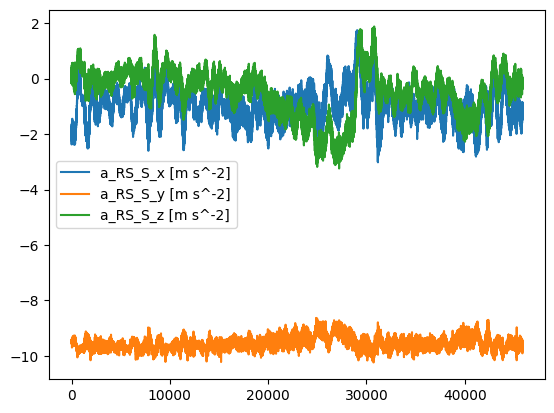

In [41]:
# df_a = df[["a_RS_S_x [m s^-2]", "a_RS_S_y [m s^-2]", "a_RS_S_z [m s^-2]"]]
df_a = df.iloc[:,4:7]
df_m = df.iloc[:,1:4]
df_a.plot.line()

In [42]:
# Can also possibly find largest delta in acceleration?
diff_a = df_a.diff()
diff_a.max()

a_RS_S_x [m s^-2]    1.864801
a_RS_S_y [m s^-2]    1.083085
a_RS_S_z [m s^-2]    1.060220
dtype: float64

In [43]:
# can also try and find average acceleration
df_a.mean()

a_RS_S_x [m s^-2]   -0.979300
a_RS_S_y [m s^-2]   -9.549879
a_RS_S_z [m s^-2]   -0.514714
dtype: float64

<AxesSubplot:>

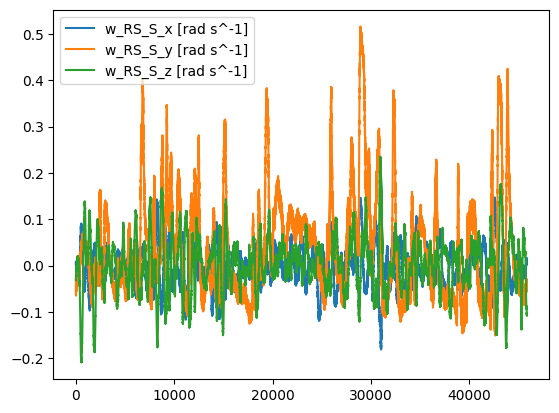

In [44]:
df_m.plot.line()

In [45]:
# can find largest rotation:
diff_m = df_m.diff()
diff_m.max()

w_RS_S_x [rad s^-1]    0.026380
w_RS_S_y [rad s^-1]    0.052360
w_RS_S_z [rad s^-1]    0.011058
dtype: float64

In [46]:
# can also try and find average angular vel
df_m.mean()

w_RS_S_x [rad s^-1]   -0.000508
w_RS_S_y [rad s^-1]    0.037878
w_RS_S_z [rad s^-1]    0.001400
dtype: float64